In [ ]:
%matplotlib notebook

In [1]:
# dependancies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import warnings
import os
from pprint import pprint
warnings.filterwarnings('ignore')


In [2]:
cwd = os.getcwd()
cwd

'/Users/kevin/Desktop/project-1'

In [3]:
# File to Load 
file_to_load = 'Resources/crime_data_all.csv'

In [4]:
# Read Crime File and store into Pandas data frame
crime_data_df = pd.read_csv(file_to_load)

In [5]:
crime= len(crime_data_df["ID"].value_counts())
crime_count=pd.DataFrame([crime], columns = ["Total Crimes Recorded"])
crime_count

,Total Crimes Recorded
0,6975703


In [6]:
crime_data_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,24761,JC444497,09/22/2019 11:52:00 PM,030XX N KIMBALL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,-87.712401,"(41.936274201, -87.712400898)",15.0,21538.0,22.0,55.0,12.0,39.0,7.0,168.0
1,11837612,JC444514,09/22/2019 11:45:00 PM,004XX W 111TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,...,-87.634289,"(41.692454712, -87.634288569)",45.0,21861.0,45.0,525.0,22.0,19.0,9.0,258.0
2,11838692,JC444512,09/22/2019 11:45:00 PM,039XX W MONTROSE AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,...,-87.725967,"(41.960970619, -87.725967322)",28.0,21538.0,16.0,117.0,38.0,39.0,1.0,9.0
3,11837693,JC444507,09/22/2019 11:42:00 PM,064XX S LAFLIN ST,0810,THEFT,OVER $500,RESIDENCE,False,True,...,-87.661712,"(41.776937286, -87.661711588)",17.0,22257.0,65.0,279.0,2.0,23.0,17.0,204.0
4,11837630,JC444521,09/22/2019 11:40:00 PM,024XX E 79TH ST,2016,NARCOTICS,MANU/DELIVER:PCP,STREET,True,False,...,-87.564609,"(41.751753433, -87.564608821)",43.0,21202.0,39.0,246.0,37.0,24.0,19.0,225.0


In [7]:
list(crime_data_df.columns)

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location',
 'Historical Wards 2003-2015',
 'Zip Codes',
 'Community Areas',
 'Census Tracts',
 'Wards',
 'Boundaries - ZIP Codes',
 'Police Districts',
 'Police Beats']

In [8]:
crime_data_df = crime_data_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
crime_data_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,24761,JC444497,09/22/2019 11:52:00 PM,030XX N KIMBALL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,-87.712401,"(41.936274201, -87.712400898)",15.0,21538.0,22.0,55.0,12.0,39.0,7.0,168.0
1,11837612,JC444514,09/22/2019 11:45:00 PM,004XX W 111TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,...,-87.634289,"(41.692454712, -87.634288569)",45.0,21861.0,45.0,525.0,22.0,19.0,9.0,258.0
2,11838692,JC444512,09/22/2019 11:45:00 PM,039XX W MONTROSE AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,...,-87.725967,"(41.960970619, -87.725967322)",28.0,21538.0,16.0,117.0,38.0,39.0,1.0,9.0
3,11837693,JC444507,09/22/2019 11:42:00 PM,064XX S LAFLIN ST,0810,THEFT,OVER $500,RESIDENCE,False,True,...,-87.661712,"(41.776937286, -87.661711588)",17.0,22257.0,65.0,279.0,2.0,23.0,17.0,204.0
4,11837630,JC444521,09/22/2019 11:40:00 PM,024XX E 79TH ST,2016,NARCOTICS,MANU/DELIVER:PCP,STREET,True,False,...,-87.564609,"(41.751753433, -87.564608821)",43.0,21202.0,39.0,246.0,37.0,24.0,19.0,225.0


In [9]:
crime_data_df["Primary Type"].value_counts()


THEFT                                1326159
BATTERY                              1148684
CRIMINAL DAMAGE                       717360
NARCOTICS                             646046
ASSAULT                               393544
OTHER OFFENSE                         389314
BURGLARY                              361352
MOTOR VEHICLE THEFT                   285761
DECEPTIVE PRACTICE                    246283
ROBBERY                               237338
CRIMINAL TRESPASS                     180436
WEAPONS VIOLATION                      70046
PROSTITUTION                           60303
PUBLIC PEACE VIOLATION                 45393
OFFENSE INVOLVING CHILDREN             42358
CRIM SEXUAL ASSAULT                    24989
SEX OFFENSE                            22377
INTERFERENCE WITH PUBLIC OFFICER       15880
GAMBLING                               13313
LIQUOR LAW VIOLATION                   12123
ARSON                                  10063
HOMICIDE                                9504
KIDNAPPING

In [10]:
# Create a group based on the values in the 'Primary Type' column
crime_group = crime_data_df.groupby('Primary Type')

# Count how many times each 'Primary Type' appears in our group
count_crime = crime_group['Primary Type'].count()

count_crime

Primary Type
ARSON                                  10063
ASSAULT                               393544
BATTERY                              1148684
BURGLARY                              361352
CONCEALED CARRY LICENSE VIOLATION        469
CRIM SEXUAL ASSAULT                    24989
CRIMINAL DAMAGE                       717360
CRIMINAL TRESPASS                     180436
DECEPTIVE PRACTICE                    246283
GAMBLING                               13313
HOMICIDE                                9504
HUMAN TRAFFICKING                         57
INTERFERENCE WITH PUBLIC OFFICER       15880
INTIMIDATION                            3683
KIDNAPPING                              5594
LIQUOR LAW VIOLATION                   12123
MOTOR VEHICLE THEFT                   285761
NARCOTICS                             646046
NON - CRIMINAL                            38
NON-CRIMINAL                             160
NON-CRIMINAL (SUBJECT SPECIFIED)           9
OBSCENITY                                5

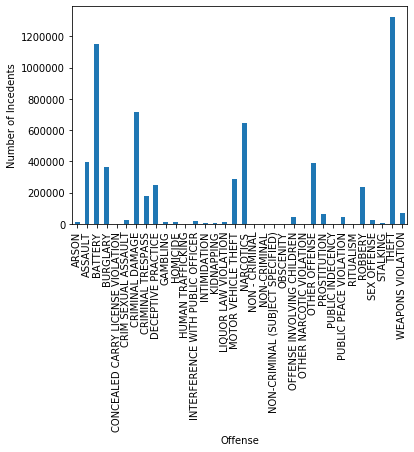

<Figure size 432x288 with 0 Axes>

In [11]:
count_chart = count_crime.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Offense")
count_chart.set_ylabel("Number of Incedents")

plt.show()
plt.tight_layout()

In [12]:
cc_df = crime_data_df["Primary Type"].value_counts().rename_axis('Offense Type').reset_index(name='counts')
print (cc_df)

                         Offense Type   counts
0                               THEFT  1326159
1                             BATTERY  1148684
2                     CRIMINAL DAMAGE   717360
3                           NARCOTICS   646046
4                             ASSAULT   393544
5                       OTHER OFFENSE   389314
6                            BURGLARY   361352
7                 MOTOR VEHICLE THEFT   285761
8                  DECEPTIVE PRACTICE   246283
9                             ROBBERY   237338
10                  CRIMINAL TRESPASS   180436
11                  WEAPONS VIOLATION    70046
12                       PROSTITUTION    60303
13             PUBLIC PEACE VIOLATION    45393
14         OFFENSE INVOLVING CHILDREN    42358
15                CRIM SEXUAL ASSAULT    24989
16                        SEX OFFENSE    22377
17   INTERFERENCE WITH PUBLIC OFFICER    15880
18                           GAMBLING    13313
19               LIQUOR LAW VIOLATION    12123
20           

<BarContainer object of 34 artists>

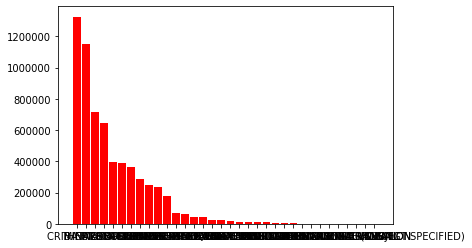

In [13]:
plt.bar(cc_df["Offense Type"], cc_df["counts"], color="r", align="center")

In [14]:
trim_df = crime_data_df[['ID','Case Number','Date','Primary Type','Description','Location Description','Arrest','Year']].copy()

In [15]:
trim_df.head()

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Year
0,24761,JC444497,09/22/2019 11:52:00 PM,HOMICIDE,FIRST DEGREE MURDER,STREET,False,2019
1,11837612,JC444514,09/22/2019 11:45:00 PM,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,2019
2,11838692,JC444512,09/22/2019 11:45:00 PM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,2019
3,11837693,JC444507,09/22/2019 11:42:00 PM,THEFT,OVER $500,RESIDENCE,False,2019
4,11837630,JC444521,09/22/2019 11:40:00 PM,NARCOTICS,MANU/DELIVER:PCP,STREET,True,2019


In [16]:
narc_df = trim_df[trim_df['Primary Type'].str.match('NARCOTICS')]

In [17]:
narc_df["Description"].value_counts()

POSS: CANNABIS 30GMS OR LESS                           255750
POSS: CRACK                                            100893
POSS: HEROIN(WHITE)                                     83267
SOLICIT NARCOTICS ON PUBLICWAY                          25008
MANU/DELIVER: HEROIN (WHITE)                            22956
POSS: COCAINE                                           22725
MANU/DELIVER:CRACK                                      20474
ATTEMPT POSSESSION NARCOTICS                            19409
POSS: CANNABIS MORE THAN 30GMS                          16167
FOUND SUSPECT NARCOTICS                                 15538
MANU/DEL:CANNABIS OVER 10 GMS                           11159
MANU/DEL:CANNABIS 10GM OR LESS                          10725
POSSESSION OF DRUG EQUIPMENT                             8899
ATTEMPT POSSESSION CANNABIS                              4519
POSS: HALLUCINOGENS                                      3885
POSS: SYNTHETIC DRUGS                                    3598
POSS: PC

In [18]:
narc_df.head()

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Year
4,11837630,JC444521,09/22/2019 11:40:00 PM,NARCOTICS,MANU/DELIVER:PCP,STREET,True,2019
8,11837618,JC444517,09/22/2019 11:26:00 PM,NARCOTICS,POSS: SYNTHETIC DRUGS,VEHICLE NON-COMMERCIAL,True,2019
53,11837622,JC444456,09/22/2019 09:47:00 PM,NARCOTICS,MANU/DELIVER: HEROIN (WHITE),STREET,True,2019
56,11837549,JC444412,09/22/2019 09:33:00 PM,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,SIDEWALK,True,2019
57,11837536,JC444411,09/22/2019 09:32:00 PM,NARCOTICS,POSS: CRACK,STREET,True,2019


In [19]:
narc_df.loc[narc_df['Description'].str.contains('MARIJUANA'), 'Description'] = 'Marijuana'

In [20]:
narc_df.loc[narc_df['Description'].str.contains('CANNABIS'), 'Description'] = 'Marijuana'

In [21]:
narc_df.loc[narc_df['Description'].str.contains('HEROIN'), 'Description'] = 'Heroin'

In [22]:
narc_df.loc[narc_df['Description'].str.contains('AMPHETAMINES'), 'Description'] = 'Amphetamines'

In [23]:
narc_df.loc[narc_df['Description'].str.contains('CRACK'), 'Description'] = 'Crack'

In [24]:
narc_df.loc[narc_df['Description'].str.contains('COCAINE'), 'Description'] = 'Cocaine'

In [25]:
narc_df.loc[narc_df['Description'].str.contains('ALTER/FORGE PRESCRIPTION'), 'Description'] = 'Rx'

In [26]:
narc_df.head()

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Year
4,11837630,JC444521,09/22/2019 11:40:00 PM,NARCOTICS,MANU/DELIVER:PCP,STREET,True,2019
8,11837618,JC444517,09/22/2019 11:26:00 PM,NARCOTICS,POSS: SYNTHETIC DRUGS,VEHICLE NON-COMMERCIAL,True,2019
53,11837622,JC444456,09/22/2019 09:47:00 PM,NARCOTICS,Heroin,STREET,True,2019
56,11837549,JC444412,09/22/2019 09:33:00 PM,NARCOTICS,Marijuana,SIDEWALK,True,2019
57,11837536,JC444411,09/22/2019 09:32:00 PM,NARCOTICS,Crack,STREET,True,2019


In [27]:
narc_df["Description"].value_counts()

Marijuana                         298927
Crack                             121367
Heroin                            110396
Cocaine                            25026
SOLICIT NARCOTICS ON PUBLICWAY     25008
ATTEMPT POSSESSION NARCOTICS       19409
FOUND SUSPECT NARCOTICS            15538
POSSESSION OF DRUG EQUIPMENT        8899
POSS: HALLUCINOGENS                 3885
POSS: SYNTHETIC DRUGS               3598
POSS: PCP                           3186
FORFEIT PROPERTY                    3156
POSS: BARBITUATES                   1633
Amphetamines                        1532
Rx                                  1014
POS: HYPODERMIC NEEDLE               628
MANU/DELIVER: HALLUCINOGEN           576
CRIMINAL DRUG CONSPIRACY             570
MANU/DELIVER:PCP                     415
MANU/DELIVER:SYNTHETIC DRUGS         403
SALE/DEL HYPODERMIC NEEDLE           259
MANU/DELIVER:BARBITUATES             209
POSS: LOOK-ALIKE DRUGS               122
SALE/DEL DRUG PARAPHERNALIA          120
MANU/DELIVER:LOO

In [28]:
#Filter Data Frame for top 5
narc_graph = narc_df[narc_df['Description'].isin(['Marijuana', 'Crack', 'Heroin', 'Cocaine', 'Amphetamines', 'Rx'])]

In [29]:
narc_graph.Description.unique()

array(['Heroin', 'Marijuana', 'Crack', 'Amphetamines', 'Cocaine', 'Rx'],
      dtype=object)

In [30]:
narc_graph["Description"].value_counts()

Marijuana       298927
Crack           121367
Heroin          110396
Cocaine          25026
Amphetamines      1532
Rx                1014
Name: Description, dtype: int64

In [31]:
narc_graph.groupby(['Description','Year'], as_index = False)['ID'].count()

,Description,Year,ID
0,Amphetamines,2002,24
1,Amphetamines,2003,33
2,Amphetamines,2004,95
3,Amphetamines,2005,124
4,Amphetamines,2006,90
5,Amphetamines,2007,47
6,Amphetamines,2008,53
7,Amphetamines,2009,40
8,Amphetamines,2010,77
9,Amphetamines,2011,101


In [32]:
ngg = narc_graph.groupby(['Description','Year'],as_index = False)['ID'].count()

In [33]:
ngg


,Description,Year,ID
0,Amphetamines,2002,24
1,Amphetamines,2003,33
2,Amphetamines,2004,95
3,Amphetamines,2005,124
4,Amphetamines,2006,90
5,Amphetamines,2007,47
6,Amphetamines,2008,53
7,Amphetamines,2009,40
8,Amphetamines,2010,77
9,Amphetamines,2011,101


In [34]:
ngg_pvt_df = ngg.pivot(index = 'Year', columns = "Description", values = "ID")
ngg_pvt_df

Description,Amphetamines,Cocaine,Crack,Heroin,Marijuana,Rx
Year,,,,,,
2001,NaN,1.0,44.0,32.0,13.0,3.0
2002,24.0,1211.0,10055.0,5747.0,11566.0,43.0
2003,33.0,1804.0,14034.0,8279.0,20432.0,68.0
2004,95.0,2043.0,14339.0,8455.0,22278.0,79.0
2005,124.0,2114.0,13864.0,8205.0,22872.0,41.0
2006,90.0,2199.0,13282.0,7785.0,23522.0,60.0
2007,47.0,2457.0,11505.0,6945.0,25848.0,59.0
2008,53.0,2049.0,8548.0,6536.0,22373.0,55.0
2009,40.0,1769.0,6601.0,6104.0,22971.0,56.0


In [35]:
narc_graph_list = [('Amphetamines','o','red'), ('Rx','o','blue'), ('Marijuana','o','green'), ('Heroin','o','black'), ('Crack','o','brown'), ('Cocaine','o','orange')]

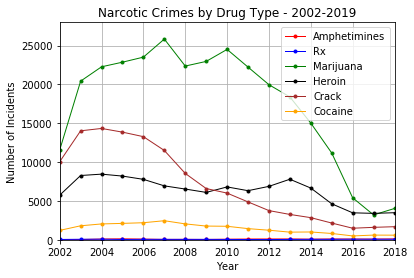

In [36]:
for Description, marker, colors in narc_graph_list:
    narc_crime_plt = plt.errorbar(ngg_pvt_df.index, ngg_pvt_df[Description],fmt = marker, markersize=3, ls = '-', color = colors, linewidth = 1.0)
    plt.legend([('Amphetimines'), ('Rx'), ('Marijuana'), ('Heroin'), ('Crack'), ('Cocaine')], loc = 'best')
    
plt.title('Narcotic Crimes by Drug Type - 2002-2019')

plt.xlim(2002,2018)
plt.xlabel('Year')
plt.ylim(0, 28000)
plt.ylabel('Number of Incidents')
plt.grid(which='major', axis='both')
plt.savefig('narcotics_analysis', dpi=200.0, facecolor='w', edgecolor='w',
       orientation='landscape', papertype=None, format=None,
       transparent=False, bbox_inches=None, pad_inches=0.1,
       frameon=None, metadata=None)
plt.show()

markersize=12